In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array= cv2.imread("training/0/Training_10120469.jpg")

In [3]:
img_array.shape  #rgb

(48, 48, 3)

In [18]:
print(img_array)

[[[ 50  50  50]
  [ 32  32  32]
  [ 15  15  15]
  ...
  [133 133 133]
  [151 151 151]
  [ 86  86  86]]

 [[ 57  57  57]
  [ 34  34  34]
  [ 22  22  22]
  ...
  [138 138 138]
  [151 151 151]
  [ 89  89  89]]

 [[ 61  61  61]
  [ 30  30  30]
  [ 24  24  24]
  ...
  [142 142 142]
  [149 149 149]
  [ 89  89  89]]

 ...

 [[103 103 103]
  [100 100 100]
  [100 100 100]
  ...
  [149 149 149]
  [104 104 104]
  [ 85  85  85]]

 [[107 107 107]
  [111 111 111]
  [113 113 113]
  ...
  [151 151 151]
  [120 120 120]
  [ 86  86  86]]

 [[104 104 104]
  [104 104 104]
  [112 112 112]
  ...
  [143 143 143]
  [136 136 136]
  [ 83  83  83]]]


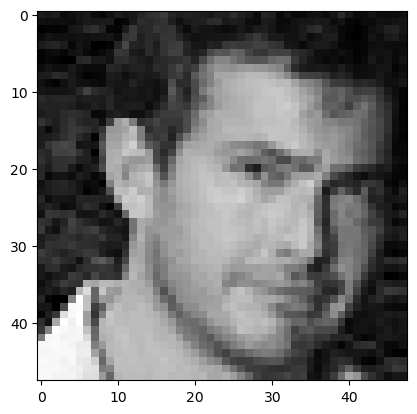

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory= "training/"  #training dataset

In [6]:
Classes=["0","1","2","3","4","5","6"]  #list if classes

Could not read image: training/0\.ipynb_checkpoints


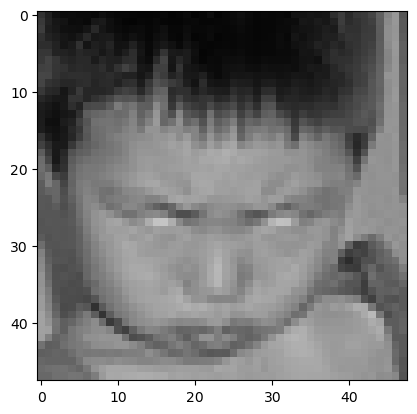

In [7]:
for category in Classes:
    path = os.path.join(Datadirectory, category)

    for img in os.listdir(path):
        img_path = os.path.join(path, img)

        img_array = cv2.imread(img_path)

        # Check if image was loaded
        if img_array is None:
            print("Could not read image:", img_path)
            continue

        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

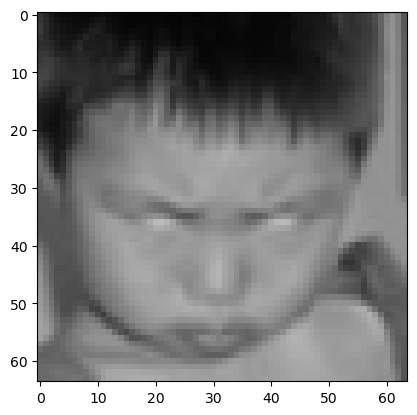

In [109]:
img_size=64
new_array=cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [110]:
new_array.shape

(64, 64, 3)

In [113]:
# code for reading all the images and convert them into the array
training_Data = []  #data

def create_training_Data():
    for category in Classes:
        path= os.path.join(Datadirectory, category)
        class_num= Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [114]:
create_training_Data()

In [115]:
print(len(training_Data))

28709


In [116]:
import random
random.shuffle(training_Data)

In [117]:
X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)  #converting it to 4 dimension

In [118]:
X.shape

(28709, 64, 64, 3)

In [119]:
#normalize the data
X=X/255.0;


In [120]:
y[1000]

2

In [121]:
type(y)

list

In [122]:
y=np.array(y)

In [123]:
y.shape

(28709,)

deep learning model for training-transfer learning

In [124]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [125]:
model = tf.keras.applications.MobileNetV3Large()

In [126]:
model.summary()

Model: "MobileNetV3Large"

┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)    ┃ Output Shape   ┃ Param # ┃ Connected to   ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ input_layer_2   │ (None, None,   │       0 │ -              │
│ (InputLayer)    │ None, 3)       │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ rescaling_1     │ (None, None,   │       0 │ input_layer_2… │
│ (Rescaling)     │ None, 3)       │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ conv (Conv2D)   │ (None, None,   │     432 │ rescaling_1[0… │
│                 │ None, 16)      │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ conv_bn         │ (None, None,   │      64 │ conv[0][0]     │
│ (BatchNormaliz… │ None, 16)      │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ activation_24   │ (None, None,   │       0 │ conv_bn[0][0]  │
│ (Activation)    │ None, 16)      │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ expanded_conv_… │ (None, None,   │     144 │ activation_24… │
│ (DepthwiseConv… │ None, 16)      │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ expanded_conv_… │ (None, None,   │      64 │ expanded_conv… │
│ (BatchNormaliz… │ None, 16)      │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ re_lu_19 (ReLU) │ (None, None,   │       0 │ expanded_conv… │
│                 │ None, 16)      │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ expanded_conv_… │ (None, None,   │     256 │ re_lu_19[0][0] │
│ (Conv2D)        │ None, 16)      │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ expanded_conv_… │ (None, None,   │      64 │ expanded_conv… │
│ (BatchNormaliz… │ None, 16)      │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ expanded_conv_… │ (None, None,   │       0 │ activation_24… │
│ (Add)           │ None, 16)      │         │ expanded_conv… │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ expanded_conv_… │ (None, None,   │   1,024 │ expanded_conv… │
│ (Conv2D)        │ None, 64)      │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ expanded_conv_… │ (None, None,   │     256 │ expanded_conv… │
│ (BatchNormaliz… │ None, 64)      │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ re_lu_20 (ReLU) │ (None, None,   │       0 │ expanded_conv… │
│                 │ None, 64)      │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ expanded_conv_… │ (None, None,   │       0 │ re_lu_20[0][0] │
│ (ZeroPadding2D) │ None, 64)      │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ expanded_conv_… │ (None, None,   │     576 │ expanded_conv… │
│ (DepthwiseConv… │ None, 64)      │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ expanded_conv_… │ (None, None,   │     256 │ expanded_conv… │
│ (BatchNormaliz… │ None, 64)      │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ re_lu_21 (ReLU) │ (None, None,   │       0 │ expanded_conv… │
│                 │ None, 64)      │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ expanded_conv_… │ (None, None,   │   1,536 │ re_lu_21[0][0] │
│ (Conv2D)        │ None, 24)      │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ expanded_conv_… │ (None, None,   │      96 │ expanded_conv… │
│ (BatchNormaliz… │ None, 24)      │         │                │
├─────────────────┼─────────────

 Total params: 5,507,432 (21.01 MB)

 Trainable params: 5,483,032 (20.92 MB)

 Non-trainable params: 24,400 (95.31 KB)

#Transfer learning -tuning,weights 

In [127]:
base_input = model.layers[0].input   #input

In [128]:
base_output=model.layers[-2].output
base_output

<KerasTensor shape=(None, 1000), dtype=float32, sparse=False, ragged=False, name=keras_tensor_904>

In [129]:
final_output=layers.Dense(128)(base_output)   #adding new layers
final_output=layers.Activation('relu')(final_output)   #activation function
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_output)  

In [130]:
final_output  #output

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, ragged=False, name=keras_tensor_910>

In [135]:
from tensorflow import keras

IMG_SIZE = 64

# 1. Input layer
base_input = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# 2. Base model
base_model = keras.applications.MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_tensor=base_input
)
base_model.trainable = False

# 3. Custom layers
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
x = keras.layers.Dense(128, activation='relu')(x)
final_output = keras.layers.Dense(7, activation='softmax')(x)

# 4. Build model
new_model = keras.Model(inputs=base_input, outputs=final_output)

new_model.summary()


C:\Users\Tejal\AppData\Local\Temp\ipykernel_24468\1408453986.py:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)    ┃ Output Shape   ┃ Param # ┃ Connected to   ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ input_layer_4   │ (None, 64, 64, │       0 │ -              │
│ (InputLayer)    │ 3)             │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ Conv1 (Conv2D)  │ (None, 32, 32, │     864 │ input_layer_4… │
│                 │ 32)            │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ bn_Conv1        │ (None, 32, 32, │     128 │ Conv1[0][0]    │
│ (BatchNormaliz… │ 32)            │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ Conv1_relu      │ (None, 32, 32, │       0 │ bn_Conv1[0][0] │
│ (ReLU)          │ 32)            │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ expanded_conv_… │ (None, 32, 32, │     288 │ Conv1_relu[0]… │
│ (DepthwiseConv… │ 32)            │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ expanded_conv_… │ (None, 32, 32, │     128 │ expanded_conv… │
│ (BatchNormaliz… │ 32)            │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ expanded_conv_… │ (None, 32, 32, │       0 │ expanded_conv… │
│ (ReLU)          │ 32)            │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ expanded_conv_… │ (None, 32, 32, │     512 │ expanded_conv… │
│ (Conv2D)        │ 16)            │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ expanded_conv_… │ (None, 32, 32, │      64 │ expanded_conv… │
│ (BatchNormaliz… │ 16)            │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ block_1_expand  │ (None, 32, 32, │   1,536 │ expanded_conv… │
│ (Conv2D)        │ 96)            │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ block_1_expand… │ (None, 32, 32, │     384 │ block_1_expan… │
│ (BatchNormaliz… │ 96)            │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ block_1_expand… │ (None, 32, 32, │       0 │ block_1_expan… │
│ (ReLU)          │ 96)            │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ block_1_pad     │ (None, 33, 33, │       0 │ block_1_expan… │
│ (ZeroPadding2D) │ 96)            │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ block_1_depthw… │ (None, 16, 16, │     864 │ block_1_pad[0… │
│ (DepthwiseConv… │ 96)            │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ block_1_depthw… │ (None, 16, 16, │     384 │ block_1_depth… │
│ (BatchNormaliz… │ 96)            │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ block_1_depthw… │ (None, 16, 16, │       0 │ block_1_depth… │
│ (ReLU)          │ 96)            │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ block_1_project │ (None, 16, 16, │   2,304 │ block_1_depth… │
│ (Conv2D)        │ 24)            │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ block_1_projec… │ (None, 16, 16, │      96 │ block_1_proje… │
│ (BatchNormaliz… │ 24)            │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ block_2_expand  │ (None, 16, 16, │   3,456 │ block_1_proje… │
│ (Conv2D)        │ 144)           │         │                │
├─────────────────┼────────────────┼─────────┼────────────────┤
│ block_2_expand… │ (None, 16, 16, │     576 │ block_2_expan… │
│ (BatchNormaliz… │ 144)           │         │                │
├─────────────────┼─────────────

 Total params: 2,422,855 (9.24 MB)

 Trainable params: 164,871 (644.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [136]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer= "adam" ,metrics =["accuracy"])

In [137]:
new_model.fit(X,y, epochs=35)

Epoch 1/35
898/898 ━━━━━━━━━━━━━━━━━━━━ 43s 41ms/step - accuracy: 0.3754 - loss: 1.6116
Epoch 2/35
898/898 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step - accuracy: 0.4488 - loss: 1.4476
Epoch 3/35
898/898 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step - accuracy: 0.5017 - loss: 1.3287
Epoch 4/35
898/898 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step - accuracy: 0.5528 - loss: 1.2019
Epoch 5/35
898/898 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step - accuracy: 0.6079 - loss: 1.0657
Epoch 6/35
898/898 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step - accuracy: 0.6629 - loss: 0.9325
Epoch 7/35
898/898 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step - accuracy: 0.7125 - loss: 0.8049
Epoch 8/35
898/898 ━━━━━━━━━━━━━━━━━━━━ 34s 37ms/step - accuracy: 0.7534 - loss: 0.6965
Epoch 9/35
898/898 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.7947 - loss: 0.5950
Epoch 10/35
898/898 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.8254 - loss: 0.5109
Epoch 11/35
898/898 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.8560 - loss: 0.4359
Epoch 12/35
898/898 ━━━━━━━━━━

In [138]:
new_model.save('final_model_95p07.h5')

In [139]:
new_model=tf.keras.models.load_model('final_model_95p07.h5')

In [140]:
frame=cv2.imread("happyboy.jpg")

In [141]:
frame.shape

(612, 612, 3)

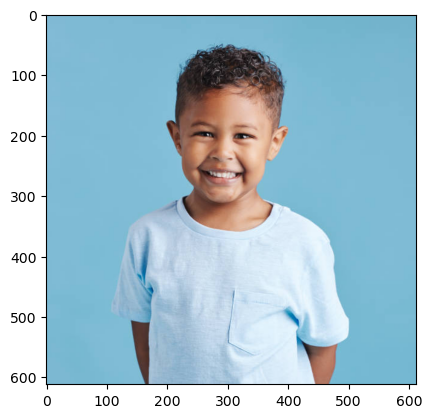

In [142]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [143]:
faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [144]:
gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [145]:
gray.shape

(612, 612)

In [146]:
faces= faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color= frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h),(255, 0, 0),2)
    faces = faceCascade.detectMultiScale(roi_gray)
    if len(faces) ==0:
        print("Face not detected")
    else:
        for(ex, ey, ew, eh) in faces:
            face_roi = roi_color[ey: ey+eh, ex:ex+ew]

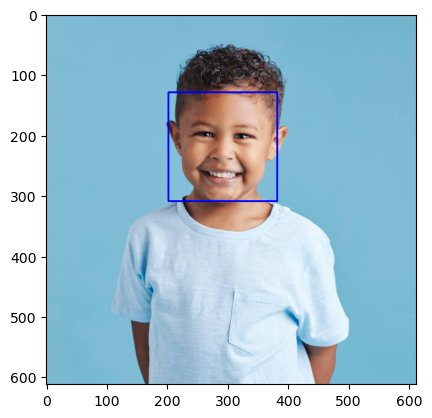

In [147]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

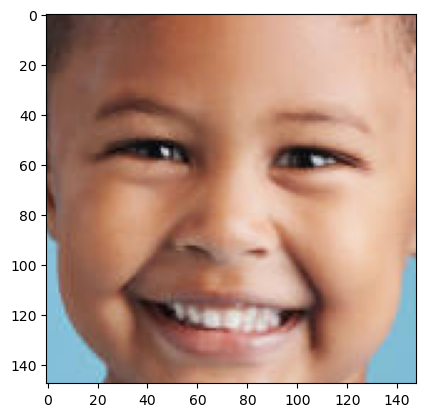

In [148]:
plt.imshow(cv2.cvtColor(face,cv2.COLOR_BGR2RGB))

In [149]:
final_image=cv2.resize(face_roi, (64,64))
final_image=np.expand_dims(final_image,axis =0)
final_image=final_image/255.0

In [150]:
Predictions= new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [151]:
Predictions[0]

array([1.3647346e-01, 1.8741870e-06, 1.1544847e-06, 1.4850898e-02,
       8.4826535e-01, 4.0735977e-04, 3.6782617e-09], dtype=float32)

In [160]:
np.argmax(Predictions)

3

# Realtime Video Demo

In [188]:
import cv2
path= "haarcascade_frontalface_default.xml"
font_scale=1.5
font= cv2.FONT_HERSHEY_PLAIN

rectangle_bgr=(255,255,255)

img=np.zeros((500,500))
text="some text in box!"
(text_width,text_height)=cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

text_offset_x=10
text_offset_y=25

box_coords = ( (text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2) )

cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,( text_offset_x, text_offset_y),font, fontScale=font_scale, color=(0,0,0), thickness=1)

cap=cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame=cap.read()

    faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces= faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color= frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h),(255, 0, 0),2)
        faces = faceCascade.detectMultiScale(roi_gray)
        if len(faces) ==0:
            print("Face not detected")
        else:
            for(ex, ey, ew, eh) in faces:
                face_roi = roi_color[ey: ey+eh, ex:ex+ew]
            
    final_image=cv2.resize(face_roi, (64,64))
    final_image=np.expand_dims(final_image,axis =0)
    final_image=final_image/255.0

    font=cv2.FONT_HERSHEY_SIMPLEX
    
    Predictions= new_model.predict(final_image)
    
    font_scale=1.5
    font=cv2.FONT_HERSHEY_PLAIN

    if(np.argmax(Predictions)==0):
        status = "Angry"

        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+ int(w1/10), y1 +int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,( 0,0,255),2)
        cv2.putText(frame,status,(100,150), font , 3,(0,0,255), 2 , cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

    elif (np.argmax(Predictions)==1):
        status = "Disgust"

        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+ int(w1/10), y1 +int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,( 0,0,255),2)
        cv2.putText(frame,status,(100,150), font , 3,(0,0,255), 2 , cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))


    elif(np.argmax(Predictions)==2):
        status = "Fear"

        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+ int(w1/10), y1 +int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,( 0,0,255),2)
        cv2.putText(frame,status,(100,150), font , 3,(0,0,255), 2 , cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

    elif(np.argmax(Predictions)==3):
        status = "Happy"

        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+ int(w1/10), y1 +int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,( 0,0,255),2)
        cv2.putText(frame,status,(100,150), font , 3,(0,0,255), 2 , cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

    elif(np.argmax(Predictions)==4):
        status = "Neutral"

        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+ int(w1/10), y1 +int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,( 0,0,255),2)
        cv2.putText(frame,status,(100,150), font , 3,(0,0,255), 2 , cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

    elif (np.argmax(Predictions)==5):
        status = "Sad"

        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+ int(w1/10), y1 +int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,( 0,0,255),2)
        cv2.putText(frame,status,(100,150), font , 3,(0,0,255), 2 , cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

    elif(np.argmax(Predictions)==6):
        status = "Surprise"

        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+ int(w1/10), y1 +int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,( 0,0,255),2)
        cv2.putText(frame,status,(100,150), font , 3,(0,0,255), 2 , cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

    else:
        status = "Bland"

        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, status, (x1+ int(w1/10), y1 +int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,( 0,0,255),2)
        cv2.putText(frame,status,(100,150), font , 3,(0,0,255), 2 , cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

   
    cv2.imshow('Face Emotion Recongition',frame)
    

    if cv2.waitKey(2) & 0xFF ==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Face not detected
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Face not detected
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 

KeyboardInterrupt: 